In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp
from astroNN.nn.layers import MCDropout
import math
# np.random.seed(0)

### In this notebook, we use a compressed version of JLA compilation
#### First, we load the trained AutoEncoder

In [2]:
np.random.seed(0)

In [3]:
autoencoder = tf.keras.models.load_model('../models/autoencoderJLA.h5')
file2 = '../data/jla_binned_distances_31nodes_v1.txt'
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)

# shuffle = [x for x in range(len(data.values)) if x%2 == 0]
# comp = [x for x in range(len(data.values)) if x%2 ==1]
# shuffle.extend(comp)
shuffle = [0,1,2,3,4,5,6,7,8,30,28,26,24,22,20,9,10,12,14,16,18,29,27,25,23,21,19,17,15,13,11]



z = data.values[:,0][shuffle]
dl = data.values[:,1][shuffle]

# scalerdl = StandardScaler()
# scalerdl.fit(dl.reshape(-1, 1))
# dll = scalerdl.transform(dl.reshape((-1,1)))

nsize = len(syscov)
np.shape(syscov)
errors = np.diag(syscov).reshape(nsize,1)
errors = np.where(errors!= 0, np.log(errors), 0)

errors = errors[shuffle]
np.shape(errors)
len(data), len(errors)

(31, 31)

# FFNN

In [4]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]

zz = np.log(z)

# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))

# scalerdl = StandardScaler()
# scalerdl.fit(dl.reshape(-1, 1))
# dll = scalerdl.transform(dl.reshape((-1,1)))
dll = dl.reshape(nsize, 1)


# scalererr = StandardScaler()
# scalererr.fit(errors.reshape(-1, 1))
# errscl = scalererr.transform(errors.reshape((-1,1)))

z_train, z_test = np.split(zz, indx)
y = np.concatenate((dll, errors), axis=1)
y_train, y_test = np.split(y, indx)
# y


In [5]:
def model2_dropout(input_z):
    efirst = Dense(200, activation='relu', input_shape=(1,))(input_z)
    x = MCDropout(0.0)(efirst)
#     x = Dense(100, activation='relu')(efirst)
#     x = MCDropout(0.01)(x)
    x = Dense(50, activation='relu')(x)
    x = MCDropout(0.0)(x)
    x = Dense(200, activation='relu')(x)
    x = MCDropout(0.005)(x)
    elast = Dense(2, activation='linear')(x)
    return elast

input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model2_dropout(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 200)               400       
_________________________________________________________________
MCDropout_1 (MCDropout)      (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
_________________________________________________________________
MCDropout_2 (MCDropout)      (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               10200     
_________________________________________________________________
MCDropout_3 (MCDropout)      (None, 200)               0     

In [6]:
model2_train = neural_model2.fit(z_train, y_train, batch_size=4,
                                    epochs=3000,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/3000
6/6 [==============================] - 0s 48ms/step - loss: 743.3607 - val_loss: 779.7770
Epoch 2/3000
6/6 [==============================] - 0s 4ms/step - loss: 749.5540 - val_loss: 756.0402
Epoch 3/3000
6/6 [==============================] - 0s 4ms/step - loss: 709.2144 - val_loss: 715.5938
Epoch 4/3000
6/6 [==============================] - 0s 5ms/step - loss: 668.2243 - val_loss: 650.9278
Epoch 5/3000
6/6 [==============================] - 0s 4ms/step - loss: 565.3084 - val_loss: 554.1430
Epoch 6/3000
6/6 [==============================] - 0s 5ms/step - loss: 534.2833 - val_loss: 421.2027
Epoch 7/3000
6/6 [==============================] - 0s 4ms/step - loss: 434.2994 - val_loss: 267.2407
Epoch 8/3000
6/6 [==============================] - 0s 4ms/step - loss: 271.7222 - val_loss: 144.0331
Epoch 9/3000
6/6 [==============================] - 0s 4ms/step - loss: 282.2903 - val_loss: 106.2557
Epoch 10/3000
6/6 [==============================] - 0s 4ms/step - loss: 289.8085

6/6 [==============================] - 0s 4ms/step - loss: 0.5124 - val_loss: 0.4200
Epoch 84/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3999 - val_loss: 0.4056
Epoch 85/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.5700 - val_loss: 0.4155
Epoch 86/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4646 - val_loss: 0.3377
Epoch 87/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4202 - val_loss: 0.3449
Epoch 88/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4083 - val_loss: 0.3460
Epoch 89/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.5292 - val_loss: 0.5824
Epoch 90/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4289 - val_loss: 0.2598
Epoch 91/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.5808 - val_loss: 0.4161
Epoch 92/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4765 - val_loss: 0.3921
Epoch 93/3000
6/6 [=====

Epoch 165/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2508 - val_loss: 0.1875
Epoch 166/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3819 - val_loss: 0.3737
Epoch 167/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3777 - val_loss: 0.2248
Epoch 168/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3250 - val_loss: 0.1804
Epoch 169/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3721 - val_loss: 0.1425
Epoch 170/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3824 - val_loss: 0.2991
Epoch 171/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4157 - val_loss: 0.1902
Epoch 172/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4682 - val_loss: 0.1959
Epoch 173/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2092 - val_loss: 0.3246
Epoch 174/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3655 - val_loss: 0.1647


Epoch 247/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2213 - val_loss: 0.0671
Epoch 248/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3728 - val_loss: 0.0664
Epoch 249/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2255 - val_loss: 0.2050
Epoch 250/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3895 - val_loss: 0.0497
Epoch 251/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2279 - val_loss: 0.1259
Epoch 252/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2682 - val_loss: 0.2642
Epoch 253/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2059 - val_loss: 0.0863
Epoch 254/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4073 - val_loss: 0.1027
Epoch 255/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2410 - val_loss: 0.0604
Epoch 256/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2000 - val_loss: 0.1293


Epoch 329/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2632 - val_loss: 0.4308
Epoch 330/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3635 - val_loss: 0.1553
Epoch 331/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2436 - val_loss: 0.1284
Epoch 332/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2469 - val_loss: 0.1315
Epoch 333/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2648 - val_loss: 0.1042
Epoch 334/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2308 - val_loss: 0.0625
Epoch 335/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2819 - val_loss: 0.1532
Epoch 336/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2195 - val_loss: 0.1202
Epoch 337/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2347 - val_loss: 0.2069
Epoch 338/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2414 - val_loss: 0.1241


Epoch 411/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1954 - val_loss: 0.0695
Epoch 412/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1921 - val_loss: 0.1737
Epoch 413/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2428 - val_loss: 0.2400
Epoch 414/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2226 - val_loss: 0.2396
Epoch 415/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1755 - val_loss: 0.0841
Epoch 416/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1847 - val_loss: 0.0834
Epoch 417/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2432 - val_loss: 0.1025
Epoch 418/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2019 - val_loss: 0.0572
Epoch 419/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1675 - val_loss: 0.0812
Epoch 420/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1738 - val_loss: 0.1136


6/6 [==============================] - 0s 4ms/step - loss: 0.2186 - val_loss: 0.0640
Epoch 493/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1853 - val_loss: 0.0724
Epoch 494/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2655 - val_loss: 0.2105
Epoch 495/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2455 - val_loss: 0.1624
Epoch 496/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2530 - val_loss: 0.2858
Epoch 497/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4095 - val_loss: 0.2099
Epoch 498/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2453 - val_loss: 0.1378
Epoch 499/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1699 - val_loss: 0.0598
Epoch 500/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.5425 - val_loss: 0.1267
Epoch 501/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2336 - val_loss: 0.2053
Epoch 502/3000


Epoch 574/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4181 - val_loss: 0.4272
Epoch 575/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.5656 - val_loss: 0.2874
Epoch 576/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.5085 - val_loss: 0.0571
Epoch 577/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2384 - val_loss: 0.0962
Epoch 578/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2567 - val_loss: 0.1056
Epoch 579/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2614 - val_loss: 0.2739
Epoch 580/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1771 - val_loss: 0.1812
Epoch 581/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2530 - val_loss: 0.2209
Epoch 582/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1962 - val_loss: 0.1001
Epoch 583/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2475 - val_loss: 0.4356


Epoch 656/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1872 - val_loss: 0.2824
Epoch 657/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.4126 - val_loss: 0.1058
Epoch 658/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2102 - val_loss: 0.1134
Epoch 659/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3232 - val_loss: 0.2191
Epoch 660/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2459 - val_loss: 0.1317
Epoch 661/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2761 - val_loss: 0.0460
Epoch 662/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3815 - val_loss: 0.2944
Epoch 663/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3030 - val_loss: 0.1442
Epoch 664/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2108 - val_loss: 0.0920
Epoch 665/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2814 - val_loss: 0.1023


Epoch 738/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3008 - val_loss: 0.2726
Epoch 739/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2316 - val_loss: 0.0697
Epoch 740/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1430 - val_loss: 0.1536
Epoch 741/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2465 - val_loss: 0.1638
Epoch 742/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1864 - val_loss: 0.1834
Epoch 743/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2556 - val_loss: 0.1301
Epoch 744/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1865 - val_loss: 0.1316
Epoch 745/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3394 - val_loss: 0.2261
Epoch 746/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2930 - val_loss: 0.1509
Epoch 747/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2359 - val_loss: 0.1772


Epoch 820/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1889 - val_loss: 0.1372
Epoch 821/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2217 - val_loss: 0.0825
Epoch 822/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2127 - val_loss: 0.1076
Epoch 823/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2344 - val_loss: 0.0771
Epoch 824/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2055 - val_loss: 0.1564
Epoch 825/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1575 - val_loss: 0.1181
Epoch 826/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1871 - val_loss: 0.1017
Epoch 827/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2758 - val_loss: 0.2672
Epoch 828/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3109 - val_loss: 0.0786
Epoch 829/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2221 - val_loss: 0.0976


Epoch 902/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2198 - val_loss: 0.0700
Epoch 903/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1806 - val_loss: 0.2092
Epoch 904/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2100 - val_loss: 0.0767
Epoch 905/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2196 - val_loss: 0.2394
Epoch 906/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1906 - val_loss: 0.1529
Epoch 907/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1719 - val_loss: 0.1837
Epoch 908/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2280 - val_loss: 0.1844
Epoch 909/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2610 - val_loss: 0.1294
Epoch 910/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1691 - val_loss: 0.1889
Epoch 911/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2173 - val_loss: 0.2124


6/6 [==============================] - 0s 4ms/step - loss: 0.3224 - val_loss: 0.2171
Epoch 984/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3937 - val_loss: 0.1312
Epoch 985/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2305 - val_loss: 0.1120
Epoch 986/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1673 - val_loss: 0.0987
Epoch 987/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1653 - val_loss: 0.3024
Epoch 988/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2503 - val_loss: 0.1697
Epoch 989/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2380 - val_loss: 0.1777
Epoch 990/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2042 - val_loss: 0.1282
Epoch 991/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1518 - val_loss: 0.3431
Epoch 992/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3526 - val_loss: 0.1106
Epoch 993/3000


6/6 [==============================] - 0s 4ms/step - loss: 0.1971 - val_loss: 0.1080
Epoch 1065/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1072 - val_loss: 0.0505
Epoch 1066/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2284 - val_loss: 0.1028
Epoch 1067/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2026 - val_loss: 0.0775
Epoch 1068/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1638 - val_loss: 0.1360
Epoch 1069/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2678 - val_loss: 0.0997
Epoch 1070/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1738 - val_loss: 0.0927
Epoch 1071/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1468 - val_loss: 0.2145
Epoch 1072/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2245 - val_loss: 0.1874
Epoch 1073/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2421 - val_loss: 0.1433
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.2925 - val_loss: 0.3142
Epoch 1146/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1941 - val_loss: 0.1033
Epoch 1147/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1658 - val_loss: 0.1549
Epoch 1148/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1448 - val_loss: 0.2523
Epoch 1149/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2909 - val_loss: 0.0783
Epoch 1150/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1823 - val_loss: 0.4764
Epoch 1151/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3069 - val_loss: 0.1746
Epoch 1152/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3198 - val_loss: 0.1234
Epoch 1153/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2172 - val_loss: 0.1461
Epoch 1154/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3219 - val_loss: 0.2090
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.2130 - val_loss: 0.2269
Epoch 1227/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3624 - val_loss: 0.1327
Epoch 1228/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3380 - val_loss: 0.1192
Epoch 1229/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1719 - val_loss: 0.1682
Epoch 1230/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1951 - val_loss: 0.1603
Epoch 1231/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2591 - val_loss: 0.0902
Epoch 1232/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2249 - val_loss: 0.0730
Epoch 1233/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1439 - val_loss: 0.0440
Epoch 1234/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1863 - val_loss: 0.2358
Epoch 1235/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2005 - val_loss: 0.2298
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.2872 - val_loss: 0.1012
Epoch 1308/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3114 - val_loss: 0.2597
Epoch 1309/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3027 - val_loss: 0.3156
Epoch 1310/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3434 - val_loss: 0.1243
Epoch 1311/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3064 - val_loss: 0.2741
Epoch 1312/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2121 - val_loss: 0.1117
Epoch 1313/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2127 - val_loss: 0.2597
Epoch 1314/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2893 - val_loss: 0.0634
Epoch 1315/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1305 - val_loss: 0.3066
Epoch 1316/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2703 - val_loss: 0.0690
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1544 - val_loss: 0.2665
Epoch 1389/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2945 - val_loss: 0.1161
Epoch 1390/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2136 - val_loss: 0.2661
Epoch 1391/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1543 - val_loss: 0.2203
Epoch 1392/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1855 - val_loss: 0.1462
Epoch 1393/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1622 - val_loss: 0.0906
Epoch 1394/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2520 - val_loss: 0.1679
Epoch 1395/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2559 - val_loss: 0.1303
Epoch 1396/3000
6/6 [==============================] - ETA: 0s - loss: 0.134 - 0s 4ms/step - loss: 0.1434 - val_loss: 0.0650
Epoch 1397/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1238 -

6/6 [==============================] - 0s 4ms/step - loss: 0.2014 - val_loss: 0.2437
Epoch 1470/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2473 - val_loss: 0.1343
Epoch 1471/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1639 - val_loss: 0.1150
Epoch 1472/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2006 - val_loss: 0.2369
Epoch 1473/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2785 - val_loss: 0.0998
Epoch 1474/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1887 - val_loss: 0.2705
Epoch 1475/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2204 - val_loss: 0.3082
Epoch 1476/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.3991 - val_loss: 0.2493
Epoch 1477/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.5011 - val_loss: 0.1768
Epoch 1478/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3033 - val_loss: 0.1972
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.4038 - val_loss: 0.2788
Epoch 1551/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3906 - val_loss: 0.1689
Epoch 1552/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1332 - val_loss: 0.1370
Epoch 1553/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1562 - val_loss: 0.1476
Epoch 1554/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2245 - val_loss: 0.1728
Epoch 1555/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2137 - val_loss: 0.1417
Epoch 1556/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1622 - val_loss: 0.1935
Epoch 1557/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2998 - val_loss: 0.0989
Epoch 1558/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3029 - val_loss: 0.3736
Epoch 1559/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.5802 - val_loss: 0.2588
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1981 - val_loss: 0.1426
Epoch 1632/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2072 - val_loss: 0.0563
Epoch 1633/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1565 - val_loss: 0.1074
Epoch 1634/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1550 - val_loss: 0.0506
Epoch 1635/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1272 - val_loss: 0.0598
Epoch 1636/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1510 - val_loss: 0.0790
Epoch 1637/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1418 - val_loss: 0.1197
Epoch 1638/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2007 - val_loss: 0.1654
Epoch 1639/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1601 - val_loss: 0.1138
Epoch 1640/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2087 - val_loss: 0.0498
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1619 - val_loss: 0.1180
Epoch 1713/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1753 - val_loss: 0.1061
Epoch 1714/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1649 - val_loss: 0.1246
Epoch 1715/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1131 - val_loss: 0.1509
Epoch 1716/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2628 - val_loss: 0.1438
Epoch 1717/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2280 - val_loss: 0.1357
Epoch 1718/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1928 - val_loss: 0.0581
Epoch 1719/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2059 - val_loss: 0.1324
Epoch 1720/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2904 - val_loss: 0.2777
Epoch 1721/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3025 - val_loss: 0.3404
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.4403 - val_loss: 0.4369
Epoch 1794/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4077 - val_loss: 0.1695
Epoch 1795/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2237 - val_loss: 0.3734
Epoch 1796/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3383 - val_loss: 0.1496
Epoch 1797/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3970 - val_loss: 0.2636
Epoch 1798/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2555 - val_loss: 0.1880
Epoch 1799/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2087 - val_loss: 0.3952
Epoch 1800/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4370 - val_loss: 0.1671
Epoch 1801/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.4042 - val_loss: 0.1301
Epoch 1802/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1704 - val_loss: 0.1545
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1185 - val_loss: 0.2578
Epoch 1875/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1976 - val_loss: 0.1720
Epoch 1876/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1809 - val_loss: 0.1643
Epoch 1877/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.2102 - val_loss: 0.1696
Epoch 1878/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1418 - val_loss: 0.0723
Epoch 1879/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1231 - val_loss: 0.1358
Epoch 1880/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1429 - val_loss: 0.1994
Epoch 1881/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1611 - val_loss: 0.1499
Epoch 1882/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2362 - val_loss: 0.1032
Epoch 1883/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1503 - val_loss: 0.1326
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1373 - val_loss: 0.2417
Epoch 1956/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2912 - val_loss: 0.4262
Epoch 1957/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2827 - val_loss: 0.1638
Epoch 1958/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2809 - val_loss: 0.1863
Epoch 1959/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2031 - val_loss: 0.1521
Epoch 1960/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2562 - val_loss: 0.2230
Epoch 1961/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1253 - val_loss: 0.1513
Epoch 1962/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1799 - val_loss: 0.1410
Epoch 1963/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1315 - val_loss: 0.1160
Epoch 1964/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2229 - val_loss: 0.0685
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1949 - val_loss: 0.1175
Epoch 2037/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1504 - val_loss: 0.1787
Epoch 2038/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1775 - val_loss: 0.0952
Epoch 2039/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2536 - val_loss: 0.1273
Epoch 2040/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1533 - val_loss: 0.0888
Epoch 2041/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2040 - val_loss: 0.0750
Epoch 2042/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1606 - val_loss: 0.1014
Epoch 2043/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2610 - val_loss: 0.2762
Epoch 2044/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2119 - val_loss: 0.0554
Epoch 2045/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1762 - val_loss: 0.0905
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.2177 - val_loss: 0.1271
Epoch 2118/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1500 - val_loss: 0.0639
Epoch 2119/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1146 - val_loss: 0.0763
Epoch 2120/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1488 - val_loss: 0.1757
Epoch 2121/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2138 - val_loss: 0.0940
Epoch 2122/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1584 - val_loss: 0.1543
Epoch 2123/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1826 - val_loss: 0.3290
Epoch 2124/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2849 - val_loss: 0.0527
Epoch 2125/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1239 - val_loss: 0.1736
Epoch 2126/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1795 - val_loss: 0.1618
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1910 - val_loss: 0.1905
Epoch 2199/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2455 - val_loss: 0.1138
Epoch 2200/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2028 - val_loss: 0.0636
Epoch 2201/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2073 - val_loss: 0.1140
Epoch 2202/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2180 - val_loss: 0.2685
Epoch 2203/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1782 - val_loss: 0.0820
Epoch 2204/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1402 - val_loss: 0.0973
Epoch 2205/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1460 - val_loss: 0.0823
Epoch 2206/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1770 - val_loss: 0.0505
Epoch 2207/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1782 - val_loss: 0.0720
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.2112 - val_loss: 0.0860
Epoch 2280/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1309 - val_loss: 0.0777
Epoch 2281/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1380 - val_loss: 0.1196
Epoch 2282/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2329 - val_loss: 0.1748
Epoch 2283/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1918 - val_loss: 0.1024
Epoch 2284/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1814 - val_loss: 0.1069
Epoch 2285/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1453 - val_loss: 0.1556
Epoch 2286/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2367 - val_loss: 0.1060
Epoch 2287/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1910 - val_loss: 0.2941
Epoch 2288/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2056 - val_loss: 0.2196
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.2350 - val_loss: 0.1445
Epoch 2361/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1838 - val_loss: 0.1454
Epoch 2362/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1954 - val_loss: 0.0873
Epoch 2363/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1226 - val_loss: 0.0709
Epoch 2364/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 0.1002
Epoch 2365/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.0968 - val_loss: 0.0858
Epoch 2366/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2611 - val_loss: 0.3493
Epoch 2367/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1543 - val_loss: 0.0909
Epoch 2368/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1459 - val_loss: 0.0855
Epoch 2369/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2590 - val_loss: 0.1489
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1792 - val_loss: 0.1585
Epoch 2442/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1777 - val_loss: 0.1045
Epoch 2443/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1703 - val_loss: 0.1436
Epoch 2444/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1176 - val_loss: 0.1204
Epoch 2445/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1271 - val_loss: 0.1423
Epoch 2446/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1287 - val_loss: 0.1122
Epoch 2447/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2211 - val_loss: 0.1529
Epoch 2448/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1930 - val_loss: 0.2356
Epoch 2449/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1213 - val_loss: 0.1018
Epoch 2450/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2134 - val_loss: 0.1851
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.2860 - val_loss: 0.6258
Epoch 2523/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.3125 - val_loss: 0.1238
Epoch 2524/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1639 - val_loss: 0.1957
Epoch 2525/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1956 - val_loss: 0.1655
Epoch 2526/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1614 - val_loss: 0.0736
Epoch 2527/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1465 - val_loss: 0.1492
Epoch 2528/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2423 - val_loss: 0.1603
Epoch 2529/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2709 - val_loss: 0.1547
Epoch 2530/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2159 - val_loss: 0.1663
Epoch 2531/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1391 - val_loss: 0.0554
Epoch 

6/6 [==============================] - 0s 5ms/step - loss: 0.1220 - val_loss: 0.0703
Epoch 2604/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1312 - val_loss: 0.1599
Epoch 2605/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2177 - val_loss: 0.2381
Epoch 2606/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2603 - val_loss: 0.1294
Epoch 2607/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1324 - val_loss: 0.0811
Epoch 2608/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1157 - val_loss: 0.1142
Epoch 2609/3000
6/6 [==============================] - 0s 7ms/step - loss: 0.4203 - val_loss: 0.2381
Epoch 2610/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.3158 - val_loss: 0.0917
Epoch 2611/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1380 - val_loss: 0.1552
Epoch 2612/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.2028 - val_loss: 0.1456
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.3946 - val_loss: 0.3231
Epoch 2685/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2476 - val_loss: 0.2546
Epoch 2686/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2113 - val_loss: 0.5070
Epoch 2687/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.5590 - val_loss: 0.1187
Epoch 2688/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3173 - val_loss: 0.1798
Epoch 2689/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2054 - val_loss: 0.2475
Epoch 2690/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1181 - val_loss: 0.1029
Epoch 2691/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2143 - val_loss: 0.1520
Epoch 2692/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2188 - val_loss: 0.0761
Epoch 2693/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1587 - val_loss: 0.2469
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1947 - val_loss: 0.1410
Epoch 2766/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1899 - val_loss: 0.0652
Epoch 2767/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1158 - val_loss: 0.1693
Epoch 2768/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2235 - val_loss: 0.1400
Epoch 2769/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3082 - val_loss: 0.2730
Epoch 2770/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.3113 - val_loss: 0.0756
Epoch 2771/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2162 - val_loss: 0.8888
Epoch 2772/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.5144 - val_loss: 0.1078
Epoch 2773/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.4446 - val_loss: 0.6412
Epoch 2774/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.5394 - val_loss: 0.1143
Epoch 

6/6 [==============================] - 0s 4ms/step - loss: 0.1117 - val_loss: 0.0453
Epoch 2847/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1062 - val_loss: 0.1232
Epoch 2848/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1195 - val_loss: 0.0903
Epoch 2849/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1805 - val_loss: 0.1073
Epoch 2850/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1368 - val_loss: 0.0953
Epoch 2851/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1114 - val_loss: 0.1040
Epoch 2852/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1160 - val_loss: 0.1032
Epoch 2853/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.0974 - val_loss: 0.0949
Epoch 2854/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1211 - val_loss: 0.1138
Epoch 2855/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1706 - val_loss: 0.2241
Epoch 

6/6 [==============================] - 0s 5ms/step - loss: 0.1388 - val_loss: 0.0886
Epoch 2928/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1384 - val_loss: 0.0897
Epoch 2929/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0829 - val_loss: 0.0830
Epoch 2930/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1385 - val_loss: 0.1411
Epoch 2931/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1702 - val_loss: 0.1257
Epoch 2932/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1593 - val_loss: 0.1290
Epoch 2933/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2163 - val_loss: 0.4194
Epoch 2934/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.2654 - val_loss: 0.0683
Epoch 2935/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1163 - val_loss: 0.1025
Epoch 2936/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0889 - val_loss: 0.0970
Epoch 

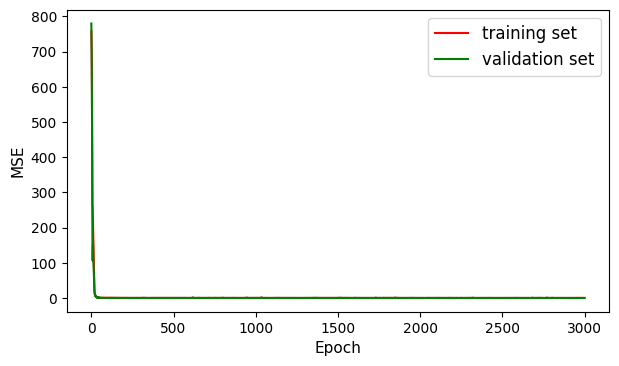

In [7]:
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model2_train.history['loss'], color='r', )
plt.plot(model2_train.history['val_loss'], color='g')

plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.title('FFNN+MC-DO', fontsize=8)

plt.savefig('loss_dropoutJLA2.png')

In [8]:
file3 = 'fake_binned_JLA2TEST1.dat'
data3 = pd.read_csv(file3, names=['z', '$D_L$'], sep = " ", skiprows=3)

# x_test = np.log(data.values[:,0])
x_test = zz
# dl = data.values[:,1:][shuffle]
np.shape(x_test)

(31,)

In [9]:
test_batch_size = 31
# x_test = np.random.uniform(np.min(z), np.max(z), test_batch_size)
# x_test = np.linspace(np.min(z), np.max(z), test_batch_size)

mc_dropout_num = 500# Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 2))

for i in range(mc_dropout_num):
    predictions[i] = neural_model2.predict(x_test)
    

prediction_mc_dropout = np.mean(predictions, axis=0, dtype=np.float64)
std_mc_dropout = np.std(predictions, axis=0, dtype=np.float64)

# get mean results and its varience
predictions_dl = prediction_mc_dropout[:,0]
# pred_err = np.exp(pred_random[:,1].reshape(-1,1))
predictions_err = np.exp(prediction_mc_dropout[:,1].reshape(-1,1))
# pred_err = np.exp(pred_random[:,1].reshape(-1,1))


sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)

np.shape(predictions), np.shape(predictions_dl), np.shape(predictions_err), np.shape(prediction_mc_dropout)


((500, 31, 2), (31,), (31, 1), (31, 2))

In [10]:
np.shape(prediction_mc_dropout), np.shape(predictions_dl), np.shape(predictions_err)
# predictions_err

((31, 2), (31,), (31, 1))

In [11]:
Om = 0.27
# variance network
w0 = -1

# def RHSquared_a_lcdm(a):
# #         return Ezlcdm(a)**2
#     return Om*(1/a)**3 + 1 - Om

def RHSquared_a_owacdm(a, w0, wa):
#         return Ezlcdm(a)**2
    rhow = a**(-3*(1.0+w0+wa))*np.exp(-3*wa*(1-a))
    return (Om/a**3+(1.0-Om)*rhow)

def DistIntegrand_a(a, w0, wa):
#         if model == 'lcdm':
#             return 1./np.sqrt(RHSquared_a_lcdm(a))/a**2
#         elif model == 'owacdm':
        return 1./np.sqrt(RHSquared_a_owacdm(a, w0, wa))/a**2
    
def Da_z(z, w0, wa):
        # r=intg.quad(self.Hinv_z,0,z)
        # this version seems to be faster
        r = intg.quad(DistIntegrand_a, 1./(1+z), 1, args=(w0, wa))

        r = r[0]
      
        return r
    
def distance_modulus(z, w0=-1, wa=0.0):
        # I think this should also work with varyPrefactor as long as BAO is there too
        # assert(not self.varyPrefactor)

        # note that our Da_z is comoving, so we're only
        # multilpyting with a single (1+z) factor
#         return 5*np.log10(Da_z(z, model, w0, wa)*(1+z)) 
    return 5*np.log10(Da_z(z, w0, wa)*(1+z))+43



In [12]:
zmodel = np.linspace(0.01, 1.5, 100)
flcdm = []
fowacdm1 = []
# fowacdm2 = []
# fowacdm3 = []

# flcdm = []
for zzz in zmodel:
    flcdm.append(distance_modulus(zzz, w0=-1, wa=0))
#     fowacdm1.append(distance_modulus(zzz, w0=-1.3, wa=1.2))
    fowacdm1.append(distance_modulus(zzz, w0=-10, wa=-100))
#     fowacdm2.append(distance_modulus(zz, model='owacdm', w0=-1, wa=-0.5))
#     fowacdm3.append(distance_modulus(zz, model='owacdm', w0=-1, wa=0.0))
    
flcdm = np.array(flcdm)
fowacdm1 = np.array(fowacdm1)
# fowacdm2 = np.array(fowacdm2)
# fowacdm3 = np.array(fowacdm3)

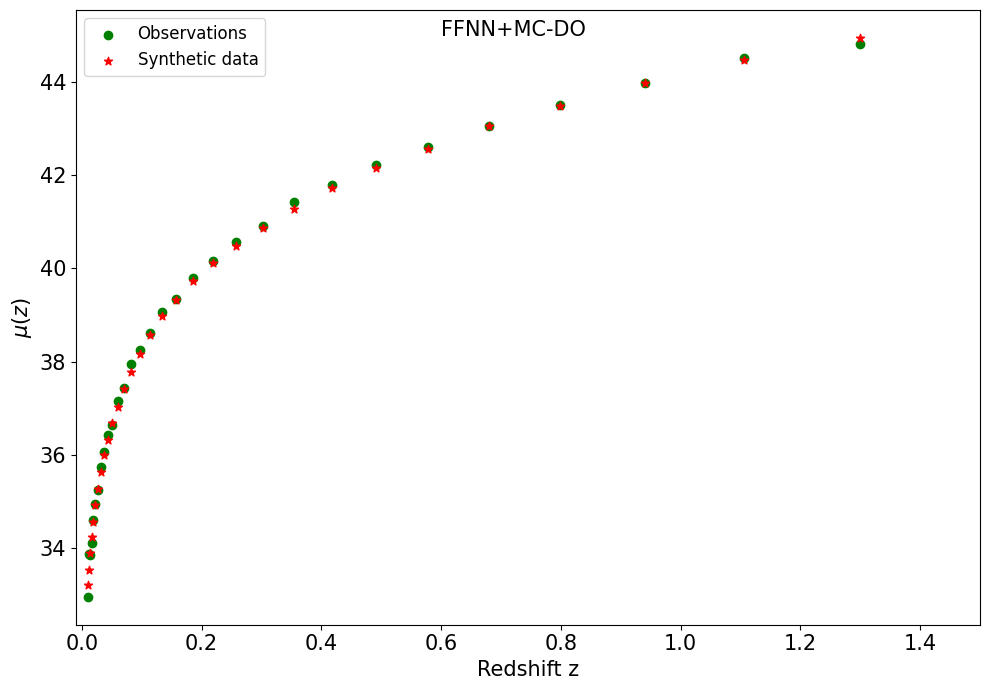

In [13]:
# Plotting
# dlfake = scalerdl.inverse_transform(prediction_mc_dropout[:,0].reshape(-1,1))
# dlfake = prediction_mc_dropout[:,0]
plt.figure(figsize=(10, 7), dpi=100)
# print(np.shape(dlfake))

# fakeerrors = np.sqrt(np.abs(np.diagonal(decoded_fake.reshape(31,31))))
# sigma = np.sqrt(std_mc_dropout.reshape(31,))

plt.scatter(z, dl, c='g', label='Observations')
# plt.errorbar(z, dl, errors, fmt='g.', markersize=10, label='Observations')
plt.scatter(z, predictions_dl, marker='*', c='r', label='Synthetic data')

# plt.errorbar(x_test, dlfake, yerr=sigma
#              , markersize=10, fmt='.', 
#              ecolor='blue', capthick=2, elinewidth=0.9, alpha=0.8, c='r',
#              label='Synthetic data')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
# plt.plot(zmodel, flcdm, label='$\Lambda CDM$', c='b')
# plt.plot(zmodel, fowacdm1, label='CPL $w_0 = -1.3, w_a=1.2$', c='m')
# plt.plot(zmodel, fowacdm2, label='$\omega_0\omega_aCDM \;\; \omega_a=-0.5$', c='y')
# plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlim(-0.01, np.max(z)+0.2)
plt.xlabel("Redshift z", fontsize=15)
plt.ylabel("$\mu(z)$", fontsize=15)
# plt.xlim(0, np.max(z))
plt.xticks(fontsize=15)
plt.text(0.6, 45, 'FFNN+MC-DO', fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.legend(loc='upper left', fontsize=12)
# plt.show()
plt.savefig('DL_dropoutb2.png')

In [14]:
index = np.argsort(z)
dlfake = predictions_dl
fake_data2 = np.stack((z[index], dlfake.reshape(31,)[index]), axis=1)


np.savetxt("fake_binned_JLADO.dat",  fake_data2, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')
np.savetxt("errors_JLA_DO.dat", predictions_err, delimiter= " ", header="#fake statistical errors", fmt='%1.9f')

In [15]:
# fake_data2
# data

In [27]:
# autoencoder.save('autoencoderJLA_DO.h5')
# decoder.save('decoderJLA_DO.h5')
# neural_model2.save('..models/FFNN_JLA_DO.h5')
tf.keras.models.save_model(neural_model2, '..models/FFNN_JLA_DO.h5' )
# encoder.save('encoderJLA_DO.h5')

In [17]:
diagcov2 = np.diag(sigma**2) #inverso
# np.savetxt("fake_binned_JLA_COVdecodedTEST.dat", diagcov2, delimiter= " ", header="#31 31")

In [18]:
autoencoder = tf.keras.models.load_model('../models/autoencoderCONV_JLA.h5')

In [19]:

def orderMag(number):
    if number == 0.0:
        return 0.0
    else:
        return math.floor(math.log(np.abs(number), 10))

def matrixMag(matrix):
    magMatrix = np.zeros((nsize, nsize))
    for row in range(nsize):
        for col in range(nsize):
            magMatrix[row, col] = orderMag(matrix[row, col])
    return magMatrix   

In [20]:
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))

nsize = len(syscov)
scaler_sys = StandardScaler()
scaler_sys.fit(syscov)
syscov = scaler_sys.transform(syscov)

magnitudes = matrixMag(syscov)



<AxesSubplot:>

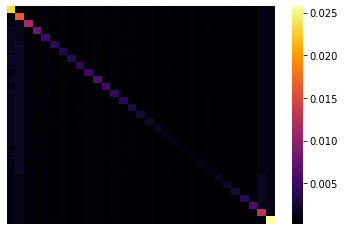

In [21]:
nsize = len(predictions_err)
filled_matrix = np.zeros((nsize, nsize))
pred_err = np.diag(predictions_err[index].reshape(31,))

pred_err_sc = scaler_sys.transform(pred_err)

# err = np.random.randn()
for row in range(nsize):
    for col in range(nsize):
        if row == col:
#             err = np.random.randn()
#             filled_matrix[row, col] = syscov[row, col] 
            filled_matrix[row, col] = pred_err_sc[row, col] 
#             filled_matrix[row, col] = 10
#     + 0.1*err*magnitudes[row, col]
        else:
            filled_matrix[row, col] = 0.1*np.abs(magnitudes[row, col]) # this work with original syscov
#             filled_matrix[row, col] = 0.1*np.random.rand()

sns.heatmap(pd.DataFrame(scaler_sys.inverse_transform(filled_matrix)),  
            xticklabels=False, yticklabels=False, 
            cmap = 'inferno', 
            robust=False)


Text(0.5, 1.0, 'Reconstructed matrix with conv-AE')

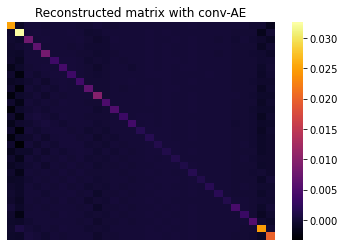

In [22]:
clean_img = autoencoder.predict(filled_matrix.reshape(1,31,31,1))

clean_imgr = scaler_sys.inverse_transform(clean_img[0,:,:,0])


sns.heatmap(pd.DataFrame(clean_imgr), 
            fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno') 
#             robust=True)




plt.title('Reconstructed matrix with conv-AE')

In [23]:
count = 0

for i in range(len(syscov)):
    for j in range(len(syscov)):
#         if np.iscomplex(syscov[i,j]):
#             print("COMPLEX")
        if clean_imgr[i,j] > clean_imgr[j,i]:
#             print(i,j)
#             print(syscov[i,j], syscov[j,i]) 
#             count+=1
            clean_imgr[i, j] = clean_imgr[j, i]
        else:
            clean_imgr[j, i] = clean_imgr[i, j]

In [24]:
np.savetxt("fake_binned_JLA_COVdecodedTESTDO.dat", clean_imgr.reshape(31,31), delimiter= " ", header="#fake COV")

<AxesSubplot:>

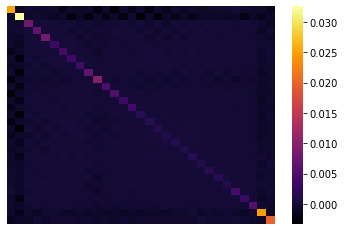

In [25]:
sns.heatmap(pd.DataFrame(clean_imgr), 
            fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno') 
#             robust=True)

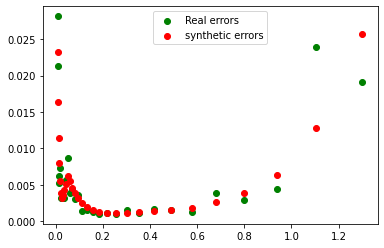

In [26]:
plt.scatter(z, np.exp(errors), c='g', label='Real errors')
plt.scatter(z, predictions_err, c='r', label='synthetic errors')
plt.legend()